In [1]:
import pandas as pd
import numpy as np
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

<h2> Load the dataset </h2>

In [2]:
data=pd.read_csv("parkinsons.data")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<h2>number of structure of the file, number of attributes, types of attributes and a general
idea of likely challenges in the dataset </h2>

In [3]:
print(data.shape)

(195, 24)


In [4]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

<h2> Observations </h2>
- No Null Handling Needed <br>
-One of the chalenges is that the data is very small and the chances of overfitting is high

<h2> Univariate Analysis </h2>

<Figure size 640x640 with 0 Axes>

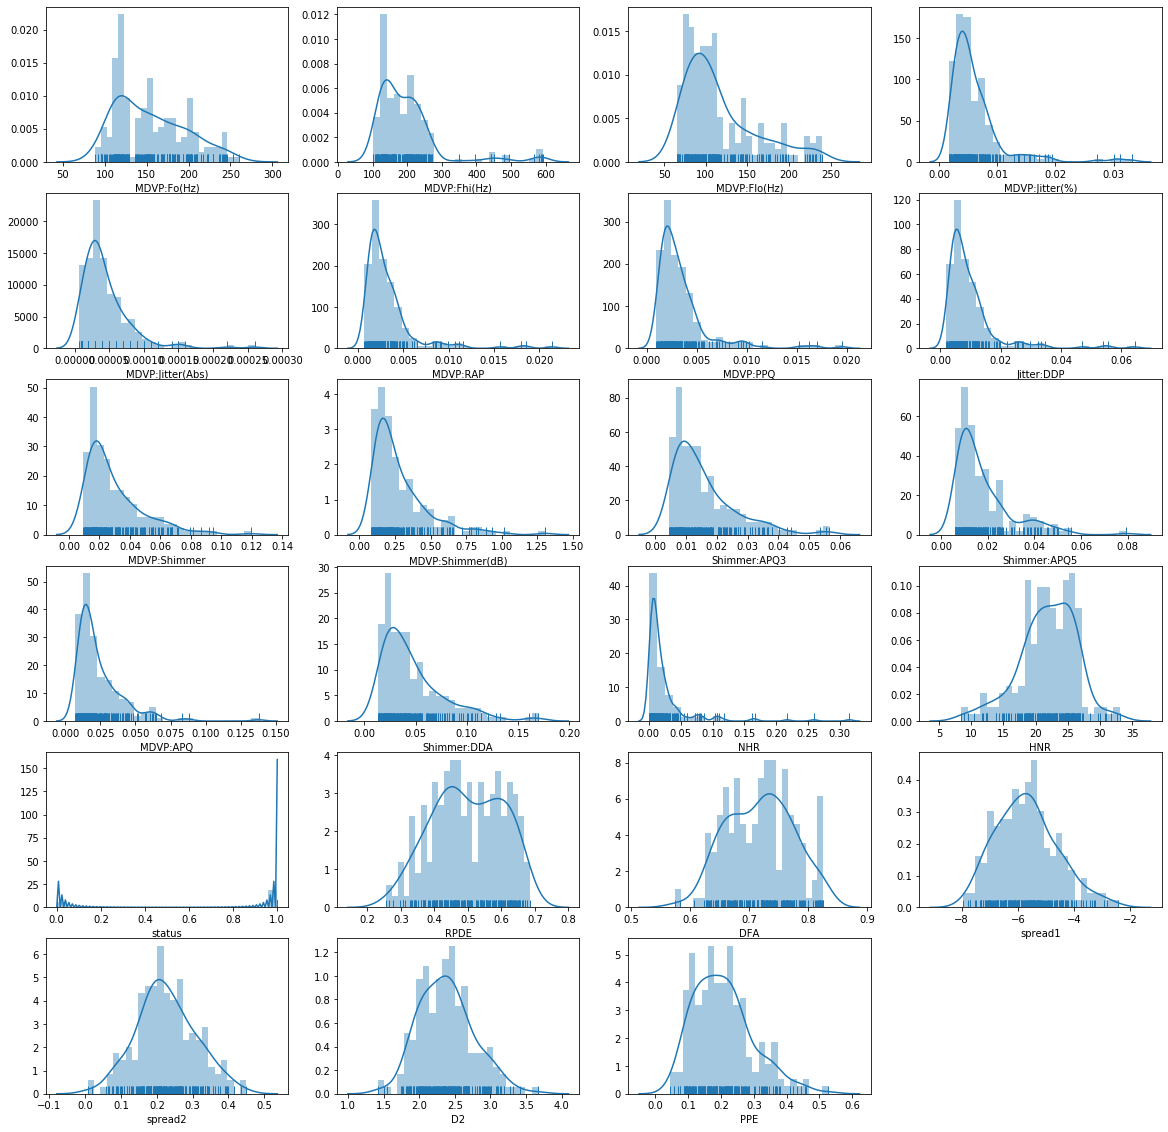

In [16]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
columns=list(data.columns.values)
columns.remove('name')


plt.figure(figsize=(20,20))
for i,val in enumerate(columns):
    plt.subplot(6,4,i+1)
    x = data[val]
    ax = sns.distplot(x,bins=25,rug=True)

<h2> Bivariate Analysis </h2>

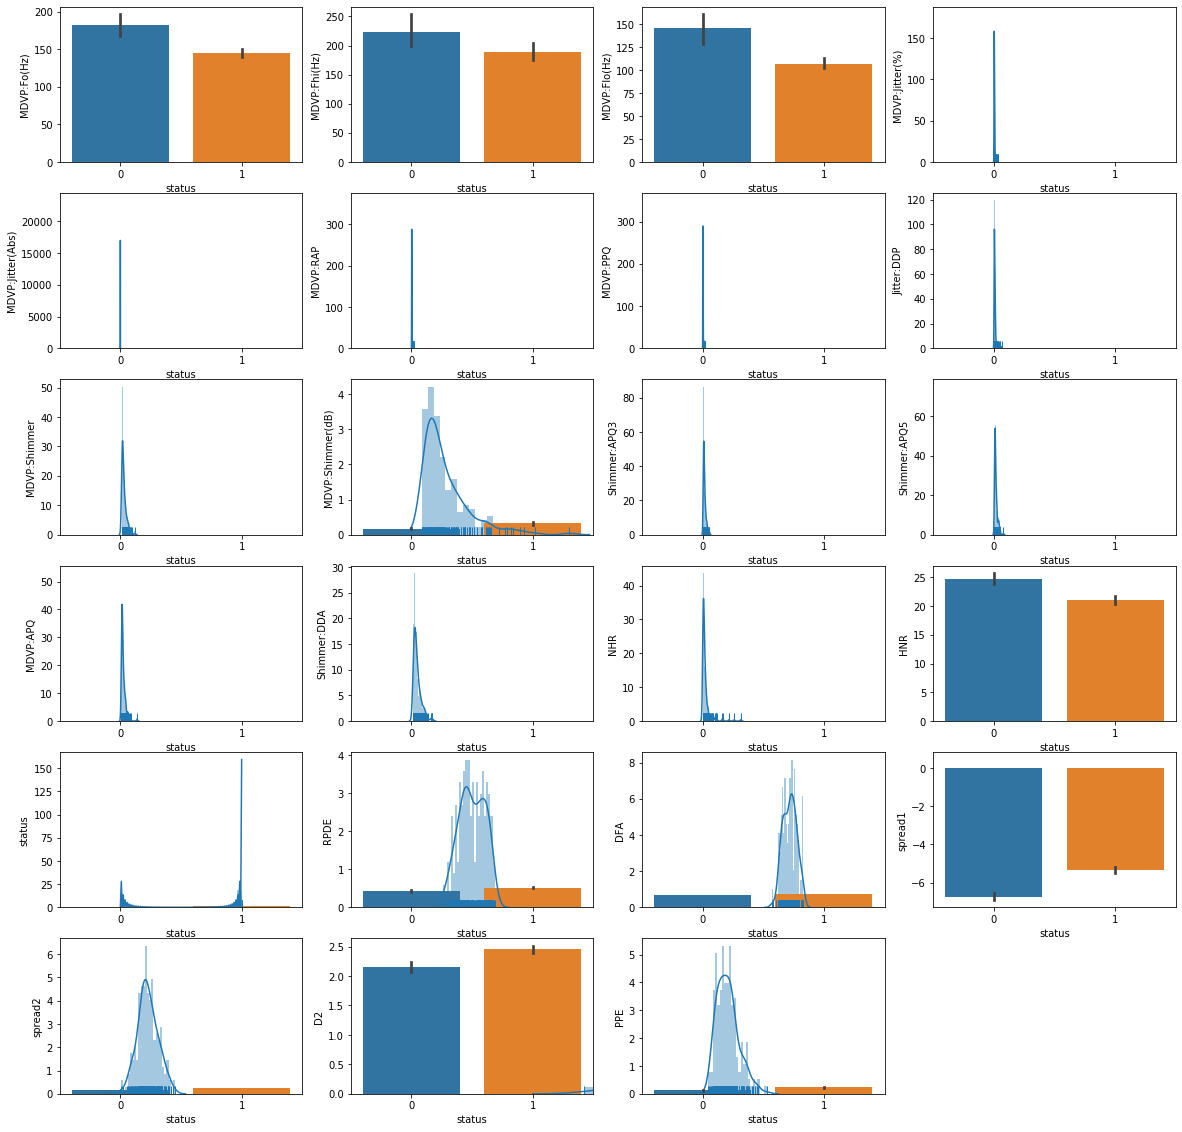

In [19]:
plt.figure(figsize=(20,20))
for i,val in enumerate(columns):
    plt.subplot(6,4,i+1)
    x = data[val]
    ax = sns.distplot(x,bins=25,rug=True)
    ax=sns.barplot(x="status", y=val, data=data)

<h2> Correlation Heat Map </h2>

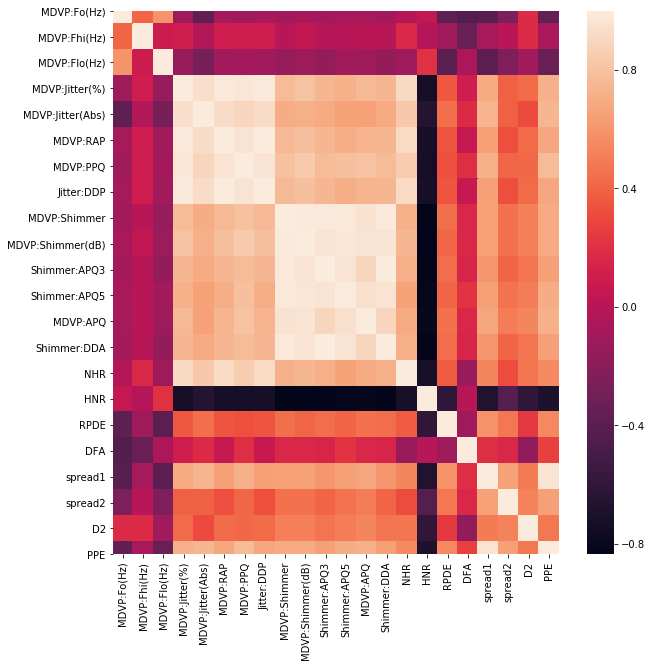

In [53]:
plt.figure(figsize=(10,10))
data_hm=data.drop(['status','name'],axis='columns')
corr=data_hm.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

<h2> Observations </h2>
- Feature HNR seems to have the least correlation between the other columns

<h2> Train Test Split </h2>

In [20]:
X=data.drop(['status','name'],axis='columns')
y=data['status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)
X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
163,112.150,131.669,97.527,0.00519,0.00005,0.00291,0.00284,0.00873,0.01756,0.155,...,0.01363,0.02902,0.01435,21.219,0.557045,0.673086,-5.617124,0.184896,1.871871,0.212386
121,176.824,215.293,83.961,0.00460,0.00003,0.00209,0.00221,0.00628,0.01169,0.117,...,0.01104,0.01603,0.01161,27.166,0.400088,0.656182,-4.711007,0.281618,2.655744,0.234809
88,173.898,211.350,74.677,0.00448,0.00003,0.00237,0.00254,0.00710,0.06727,0.650,...,0.04802,0.11363,0.04214,14.739,0.599371,0.743937,-5.783272,0.299793,3.007096,0.194052
151,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,0.13778,0.16942,0.21713,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
112,204.664,221.300,189.621,0.00841,0.00004,0.00502,0.00485,0.01506,0.02378,0.210,...,0.01767,0.03831,0.01316,21.305,0.498877,0.722085,-4.876336,0.212054,2.376749,0.268144


<h2> Create the model using “entropy” method </h2>

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
classifier = DecisionTreeClassifier(criterion ='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h2> Test the model on test data and what is the accuracy achieved </h2>

In [33]:
y_test_pred=classifier.predict(X_test)
print("Test Accuracy",accuracy_score(y_test, y_test_pred))
y_train_pred=classifier.predict(X_train)
print("Train Accuracy",accuracy_score(y_train, y_train_pred),'\n')
cf_matrix=confusion_matrix(y_test,y_test_pred)
print('cf_matrix_test \n',cf_matrix,'\n')

print('crosstab \n')
pd.crosstab(y_train,y_train_pred,margins=True)

Test Accuracy 0.9322033898305084
Train Accuracy 0.9485294117647058 

cf_matrix_test 
 [[16  1]
 [ 3 39]] 

crosstab 



col_0,0,1,All
status,,,
0,27,4,31
1,3,102,105
All,30,106,136


<h2> Use regularization parameters of max_depth, min_sample_leaf </h2>

In [28]:
classifier = DecisionTreeClassifier(criterion ='entropy',max_depth=3,min_samples_leaf=1)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
y_test_pred=classifier.predict(X_test)
print("Test Accuracy",accuracy_score(y_test, y_test_pred))
y_train_pred=classifier.predict(X_train)
print("Train Accuracy",accuracy_score(y_train, y_train_pred),'\n')
cf_matrix=confusion_matrix(y_test,y_test_pred)
print('cf_matrix_test \n',cf_matrix,'\n')

Test Accuracy 0.9322033898305084
Train Accuracy 0.9485294117647058 

cf_matrix_test 
 [[16  1]
 [ 3 39]] 



<h2> Observations </h2><br>
- Using a simple model the train accuracy was 100% and the differnce between train and test accuracy was 9% <br>
- When regularization was introduced the gap between train and test accuracy reduced to 1% thus making the model less overfit.

In [40]:
from sklearn.model_selection import GridSearchCV

estimator=RandomForestClassifier(max_depth=2, random_state=0)
parameters={'n_estimators':[1,10,25,50,100,150,200]}
print(parameters)
#print(list(y_train))

clf = GridSearchCV(estimator, parameters, cv=3, scoring='accuracy',return_train_score=True)
clf.fit(X_train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results.sort_values('mean_test_score',ascending=False)

{'n_estimators': [1, 10, 25, 50, 100, 150, 200]}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,0.029339,0.003776,0.002666,0.003771,25,{'n_estimators': 25},0.826087,0.844444,0.844444,0.838325,0.008654,1,0.922222,0.912088,0.901099,0.911803,0.008626
3,0.058669,0.003777,0.007998,0.000006,50,{'n_estimators': 50},0.826087,0.844444,0.844444,0.838325,0.008654,1,0.900000,0.912088,0.912088,0.908059,0.005698
4,0.109319,0.007551,0.013207,0.003685,100,{'n_estimators': 100},0.826087,0.822222,0.866667,0.838325,0.020102,1,0.922222,0.912088,0.901099,0.911803,0.008626
5,0.180827,0.009927,0.009881,0.005683,150,{'n_estimators': 150},0.826087,0.822222,0.844444,0.830918,0.009694,4,0.911111,0.912088,0.901099,0.908099,0.004966
6,0.238783,0.013178,0.016007,0.000007,200,{'n_estimators': 200},0.804348,0.822222,0.844444,0.823671,0.016401,5,0.922222,0.901099,0.901099,0.908140,0.009958
1,0.016000,0.006542,0.002667,0.003771,10,{'n_estimators': 10},0.804348,0.844444,0.800000,0.816264,0.020005,6,0.911111,0.901099,0.868132,0.893447,0.018361
0,0.002666,0.003771,0.002667,0.003772,1,{'n_estimators': 1},0.804348,0.711111,0.866667,0.794042,0.063922,7,0.844444,0.824176,0.846154,0.838258,0.009982


In [47]:
print('Optimum Number of Trees = 25')

Optimum Number of Trees = 25
